<a href="https://colab.research.google.com/github/mdaugherity/MachineLearning2024/blob/main/class/HW2_Mystery_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#HW 2 - Using Mystery Classifiers
Before we dig in to see how classifiers **work**, I think it is very helpful to see how they are **used**.  The basic commands we need for a classifier *clf* is:
* ```clf.fit(X_train, y_train)```  : use training data to learn to reproduce the right answers
* ```clf.predict(X)``` : classify samples in X to predict y  
* ```clf.score(X,y)``` : calls predict(X) and measures the accuracy against the right answers in y




# Example
To get you started, here's an example using these commands in the standard steps in a Machine Learning analysis
* Getting Data
* Preprocessing
* Training
* Evaluating
* Predicting

Don't modify code in this section.



**Getting Data:**  Let's use the *make_moons* command to generate some fake data with 2 features and 2 classes


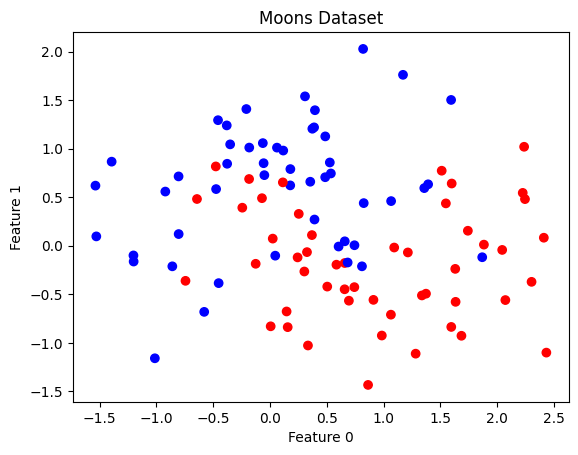

In [2]:
X,y = datasets.make_moons(n_samples=100, random_state=0, noise=0.5)

plt.scatter(X[:,0], X[:,1],c=y, cmap='bwr')
plt.title('Moons Dataset')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

**Preprocessing**: Do the standard test/train split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Training**: Let's get a nice linear classifier.  The details on how it works don't concern us now (but we will go through it in a few weeks).  This problem is about practicing using an sklearn classifier.

To "learn" from data you need the command:
```
clf.fit(X_train, y_train)
```
Never ever call fit on your test data.

You can see the complete list of methods you can call on this classifier here: https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC.decision_function


In [4]:
clf = LinearSVC()
clf.fit(X_train,y_train)

LinearSVC()

Let's take a look at the decision boundary.  How well is a linear classifier able to seperate red from blue?

We will use the built-in Decision Boundary Display:
https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html

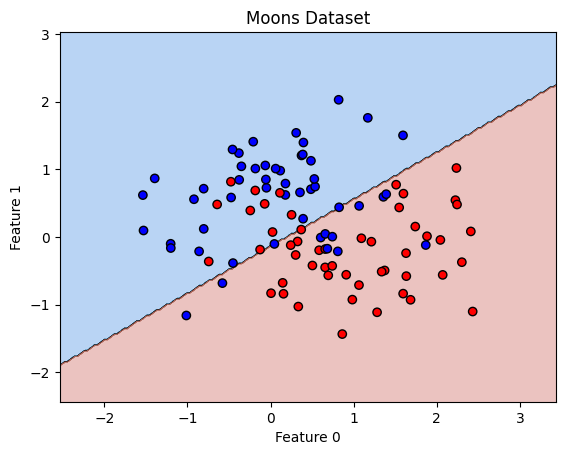

In [5]:
disp = DecisionBoundaryDisplay.from_estimator(clf,X, response_method='predict',cmap='berlin',alpha=0.5, grid_resolution=200)
plt.scatter(X[:,0], X[:,1],c=y, edgecolor='k',cmap='bwr')

plt.title('Moons Dataset')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

**Evaluating:** We can use the *score* method to get a simple accuracy.  

In [6]:
print(f"Train:\t{clf.score(X_train,y_train):0.2f}")
print(f"Test:\t{clf.score(X_test,y_test):0.2f}")

Train:	0.79
Test:	0.80


**Predicting:** Using a trained classifier is easy with the *predict(X)* function.  Remember that X is always a 2D array (even for predicting just one sample)

In [7]:
clf.predict([[0,0]])

array([0])

# Problem 1 - Moons

Use the example dataset given above

a) Does this classifier underfit, overfit, or fit well?  Justify your answer




b) Is class 0 red or blue?  Prove your answer by predicting one or more points and showing them on a new scatterplot

c) Print a clasification report on the test data

# Problem 2 - Blobs

Use this dataset and classifier


In [8]:
X,y = datasets.make_blobs(n_samples=100, random_state=0, centers=[[-1,0],[1,0]], cluster_std=2)
clf = DecisionTreeClassifier(max_depth=6)

a) Do the standard test/train split and plot the data.  Make the test and train points look different.

b) Train the classifier and plot the decision boundary.

c) Does this classifier underfit, overfit, or fit well?  Justify your answer

# Problem 3 - Tuning
You may get used to plotting decision boundaries to see how well your classifier is working.  Unfortunately, some problems are virtually impossible to visualize this way.  

Here's a dataset with 20 features and 2 classes

In [9]:
X,y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X.shape

(100, 20)

In [10]:
clf = SVC(kernel="poly",degree=0)

You need to tune the options ("hyperparameters") of a classifier to find the best one.  Try changing the degree to 0, 1, or 2.  Which one gives the best balance between under-fitting and over-fitting?